# Milestone 1  
You will submit a Jupyter notebook (Python 3) that implements fol-lowing instructions:
    1.  Load the MRI volumes
    2.  Determine the pixel spacing and slice thickness of each loaded volume
    3.  Extract, visualize, and save middle coronal slices for all training+validation cases, including the MRIs and segmentations.

In [1]:
import os
import numpy as np
import nibabel as nib
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline

cases = []
coronal_slice_idx = 63
DATA_PATHS = ["./Validation/", "./Training/"]
for data_path in DATA_PATHS:
    for subDir0 in glob(data_path +"/*/"):
        for subDir1 in glob(subDir0 +"/*/"):
            # generates the filenames with paths, and loads the image file
            [img_fpath] = glob(subDir1 +"analyze/*.img")
            img = nib.load(img_fpath)
            
            # collects the name and pixel spacing information of each case
            img_data = img.get_fdata()
            spacing = img.header.get_zooms()[:2]
            thickness = img.header.get_zooms()[2]
            name = os.path.splitext(os.path.basename(img_fpath))[0]
            entry = {
                         "name": name,
                         "type": data_path[2:-1], 
                         "spacing": spacing,
                         "thickness":thickness, 
                         "slice": img_data[:,:,coronal_slice_idx,0]
                    }
            cases.append(entry)

In [2]:
## save the all cases as a file
import pickle
f = open("cases.pkl","wb")
pickle.dump(cases,f)
f.close()

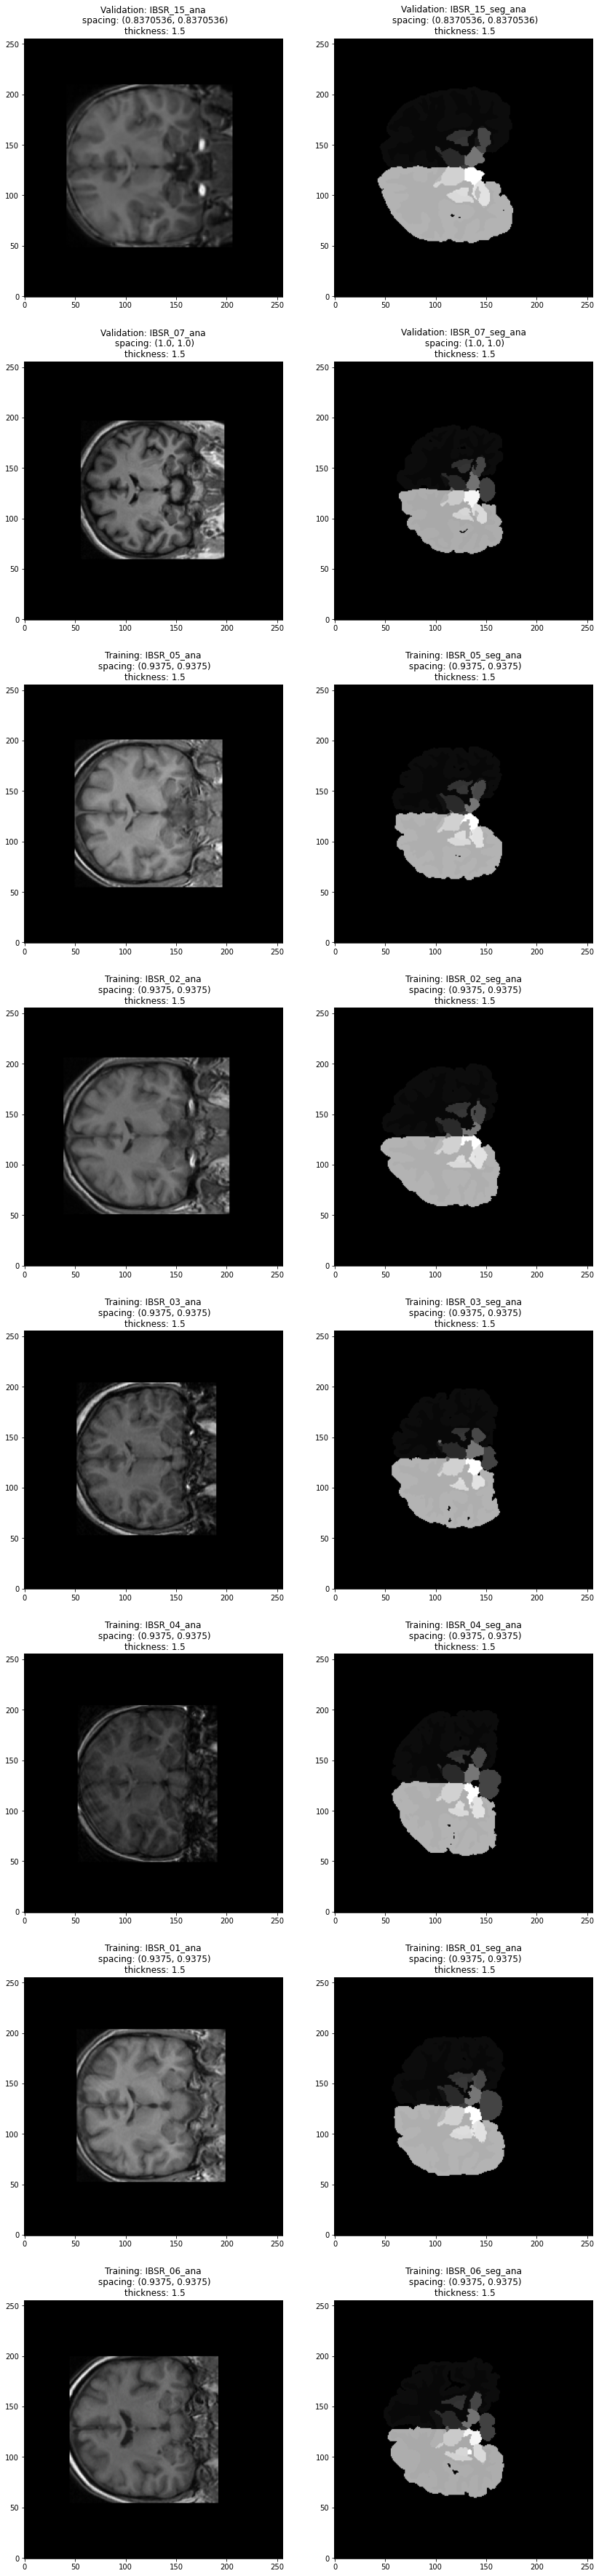

In [3]:
## visualizes the all cases in a grid
def show_slices(rows, cols):
    """ Function to display row of image slices """
    fig, axes = plt.subplots(rows, cols, figsize=(14,16*(rows/cols)))
    for i, case in enumerate(cases):
        r,c = i//cols, i%cols
        axes[r,c].clear()
        axes[r,c].set_title(str(case["type"])+": "+str(case["name"])+
                            "\n spacing: "+ str(case["spacing"])+
                            "\n thickness: "+ str(case["thickness"]))
        axes[r,c].imshow(case["slice"], cmap="gray", origin="lower")
        
        
cols = 2
rows = int(np.ceil(len(cases)/cols))          
show_slices(rows, cols)